# The Convolutional Classifier

Step 1 - Load Data

In [ ]:
# !pip install ruamel_yaml

In [1]:
# !python -m pip install --upgrade pip --user

In [2]:
# !pip install h5py
# !pip install typing-extensions
# !pip install wheel

In [3]:
# !pip3 install --upgrade tensorflow --user
# !pip3 install tf-nightly --user

In [4]:
# !pip3 install --upgrade tensorflow-gpu --user

In [5]:
# !pip3 show tensorflow
# !pip3 install tensorflow

In [6]:
# !python -c "import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
# !python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [ ]:
# if tf.test.gpu_device_name(): 

#     print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

# else:

#    print("Please install GPU version of TF")

In [50]:
# with tf.compat.v1.device('/gpu:0'):
#     a = tf.compat.v1.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
#     b = tf.compat.v1.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
#     c = tf.compat.v1.matmul(a, b)

# with tf.compat.v1.Session() as sess:
# #     hello = tf.constant('Hello, TensorFlow!')
# #     print(sess.run(hello))
# #     print(sess.list_devices())
#     print (sess.run(c))

In [30]:
# !pip install wheel
# !pip install pandas

In [31]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from pathlib import Path

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd

In [51]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [20]:
comp_dir = Path('C:/Amin/Workspace/Data/Kaggle/Computer Vision')  # ('../input/store-sales-time-series-forecasting')


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    "C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/train",
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

ds_valid_ = image_dataset_from_directory(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [21]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Step 2 - Define Pretrained Base

In [23]:
pretrained_base = tf.keras.models.load_model(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive (2)/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

Step 3 - Attach Head

In [25]:
model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

Step 4 - Train

In [52]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=0,
)

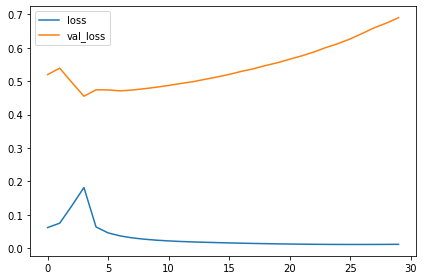

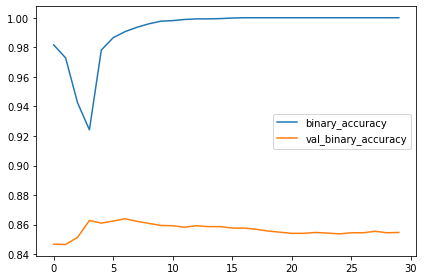

In [53]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();